In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
iris = load_iris()

In [ ]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


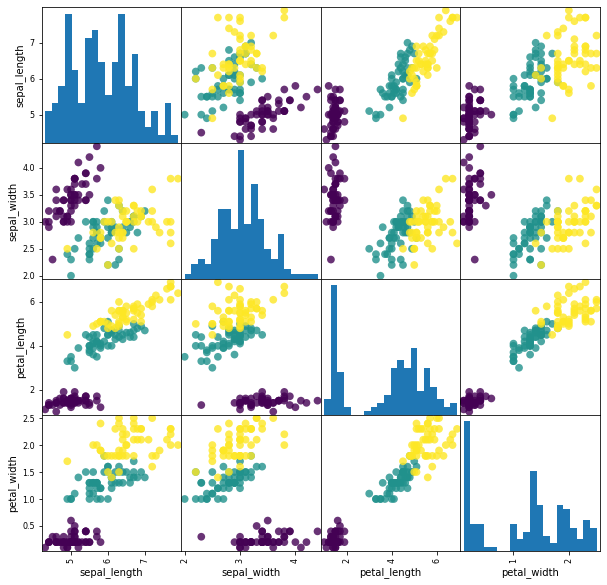

In [ ]:
color = ['setosa', 'versicolor', 'virginica']
pd.plotting.scatter_matrix(iris.iloc[:, :-1], 
                           c=iris['species'].apply(lambda x : color.index(x)), figsize = (10, 10),
                           marker='o', hist_kwds={'bins':20}, s=60, alpha=0.8)
plt.show()

In [ ]:
from plotly.express import scatter_3d
fig = scatter_3d(iris, x= 'sepal_length', y='petal_length', z= 'petal_width', color = 'petal_width', symbol = 'species')
fig.update_traces(marker_size=2)
fig.show()

In [ ]:
iris['label'] = iris['species'].apply(lambda x : list(iris['species'].unique()).index(x))
iris
# ['setosa', 'versicolor', 'virginica'] 을 0, 1, 2으로 바꿈

,sepal_length,sepal_width,petal_length,petal_width,species,label
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [ ]:
from sklearn.preprocessing import OneHotEncoder
y = np.array(iris.label).reshape(-1, 1)
encoder = OneHotEncoder(sparse = False)
encoded_y = encoder.fit_transform(y)
encoded_y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    iris.iloc[:, :-2], encoded_y, test_size = 0.2)
print('X_train shape :', X_train.shape)
print('X_test shape :', X_test.shape)
print('Y_train shape :', Y_train.shape)
print('Y_test shape :', Y_test.shape)

X_train shape : (120, 4)
X_test shape : (30, 4)
Y_train shape : (120, 3)
Y_test shape : (30, 3)


In [ ]:
model = Sequential()
model.add(Dense(256, input_dim = 4, activation = 'relu')) #Dense 클래스는 (완전 연결된) 하나의 뉴런층을 구현
model.add(Dense(128, activation = 'relu')) # 은닉층 (Hidden layer)의 활성화함수로 ReLU (Rectified Linear Unit)를 사용
model.add(Dense(512, activation = 'relu')) 
model.add(Dense(3, activation = 'softmax')) #3개의 값을 쓸때는 softmax
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               1280      
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 512)               66048     
                                                                 
 dense_7 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 101,763
Trainable params: 101,763
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt = Adam(lr = 0.001)
model.compile(opt, loss='categorical_crossentropy', metrics= ['accuracy'])
fit_hist = model.fit(X_train, Y_train, batch_size=5, epochs=50, verbose=1)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



24/24 [==============================] - 0s 3ms/step - loss: 0.7356 - accuracy: 0.6000
Epoch 2/50
24/24 [==============================] - 0s 2ms/step - loss: 0.3646 - accuracy: 0.8167
Epoch 3/50
24/24 [==============================] - 0s 3ms/step - loss: 0.2479 - accuracy: 0.8833
Epoch 4/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2192 - accuracy: 0.9083
Epoch 5/50
24/24 [==============================] - 0s 2ms/step - loss: 0.1241 - accuracy: 0.9583
Epoch 6/50
24/24 [==============================] - 0s 3ms/step - loss: 0.1300 - accuracy: 0.9500
Epoch 7/50
24/24 [==============================] - 0s 3ms/step - loss: 0.1426 - accuracy: 0.9500
Epoch 8/50
24/24 [==============================] - 0s 3ms/step - loss: 0.1554 - accuracy: 0.9500
Epoch 9/50
24/24 [==============================] - 0s 3ms/step - loss: 0.1710 - accuracy: 0.9167
Epoch 10/50
24/24 [==============================] - 0s 3ms/step - loss: 0.1105 - accuracy: 0.9583
Epoch 11/50
24/24 [===========

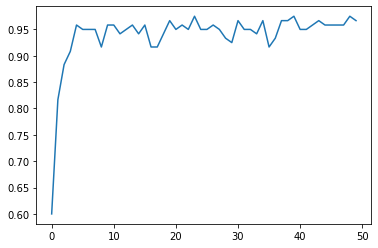

In [ ]:
plt.plot(fit_hist.history['accuracy'])

plt.show()

In [ ]:
score = model.evaluate(X_test, Y_test, verbose = 0)

print('Final test set accuracy :', score[1])

Final test set accuracy : 1.0


In [ ]:
labels = ['setosa', 'versicolor', 'virginica']

In [ ]:
my_sample = np.random.randint(30)
sample = X_test.iloc[my_sample]
pred = model.predict(np.array(sample).reshape(1, 4))
print(pred)
print('Actual', labels[np.argmax(Y_test[my_sample])])
print('Prediction after learnin is :', labels[np.argmax(pred)])

1/1 [==============================] - 0s 15ms/step
[[2.641646e-04 9.950087e-01 4.727091e-03]]
Actual versicolor
Prediction after learnin is : versicolor
